# Challenge 3

In [144]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#### Import the titanic file. Name your dataset `titanic`.

In [145]:
titanic = pd.read_csv('./titanic.csv',low_memory=False)
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes

In [146]:
#your code here

print("total rows:", len(titanic.index))
print(titanic.dtypes)

total rows: 1309
PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


#### What are your numerical variables? What are your categorical variables?

*Hint: Use Pandas `select_dtypes`*

In [147]:
# your code here- numerical variable

# display(titanic.select_dtypes(exclude = object).head())

display(titanic.select_dtypes(include = [int, float]).head())

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.0,1,0,7.2500
1,2,1.0,1,38.0,1,0,71.2833
2,3,1.0,3,26.0,0,0,7.9250
3,4,1.0,1,35.0,1,0,53.1000
4,5,0.0,3,35.0,0,0,8.0500


In [148]:
#your code here- categorical variable

display(titanic.select_dtypes(object).head())

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S


#### Use the appropriate visulalization to show the distribution of the column `Age`

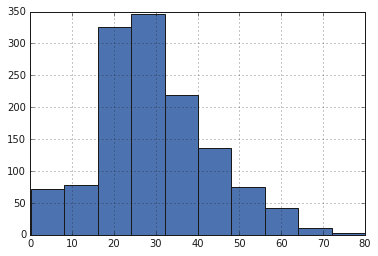

In [149]:
# your code here

titanic["Age"].hist()

#### Set the plot style to `classic` and the figure size to `(12,6)`

*Hint: To set the style you can use `matplotlib.pyplot` functions or seaborn*

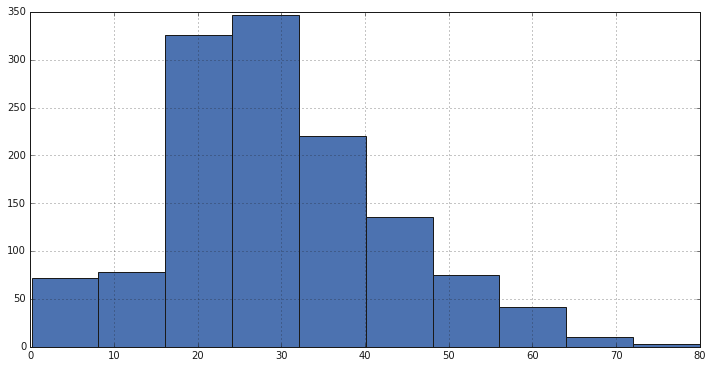

In [150]:
# your code here

titanic["Age"].hist(figsize = (12,6))
plt.style.use(["classic"])

#### Use subplots to plot the distribution of the `Age` variable with bins equal to `10`, `20` and `50`.

(array([ 22.,  19.,  10.,  11.,  10.,  13.,   8.,   8.,  23.,  26.,  20.,
         75.,  29.,  93., 109.,  43.,  72.,  68., 111.,  53.,  71.,  47.,
         35.,  24.,  43.,  26.,  29.,  15.,  35.,  31.,  15.,  26.,   7.,
         14.,  13.,   5.,   9.,   8.,  11.,   9.,   3.,   2.,   0.,   2.,
          3.,   0.,   1.,   1.,   0.,   1.]),
 array([ 0.17  ,  1.7666,  3.3632,  4.9598,  6.5564,  8.153 ,  9.7496,
        11.3462, 12.9428, 14.5394, 16.136 , 17.7326, 19.3292, 20.9258,
        22.5224, 24.119 , 25.7156, 27.3122, 28.9088, 30.5054, 32.102 ,
        33.6986, 35.2952, 36.8918, 38.4884, 40.085 , 41.6816, 43.2782,
        44.8748, 46.4714, 48.068 , 49.6646, 51.2612, 52.8578, 54.4544,
        56.051 , 57.6476, 59.2442, 60.8408, 62.4374, 64.034 , 65.6306,
        67.2272, 68.8238, 70.4204, 72.017 , 73.6136, 75.2102, 76.8068,
        78.4034, 80.    ]),
 <a list of 50 Patch objects>)

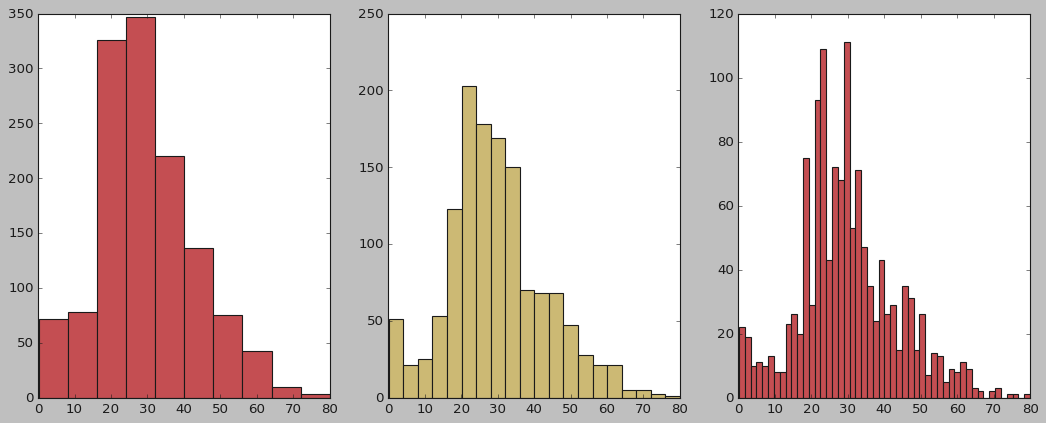

In [151]:
# your code here

fig, axs = plt.subplots(1, 3, figsize = (16, 6))

axs[0].hist(titanic["Age"], bins = 10, color = "r")
axs[1].hist(titanic["Age"], bins = 20, color = "y")
axs[2].hist(titanic["Age"], bins = 50, color = "r")

#### Whether the bin size affects your plot? Why?

Yes, it will modify the y-Axis. The narrower the bin, the fewer records it will contain, and so the less repeated their values will be. Therefore, the more bins you divide your data into, the shorter the y-axis will be.

#### Use seaborn to show the distribution of the column `Age`

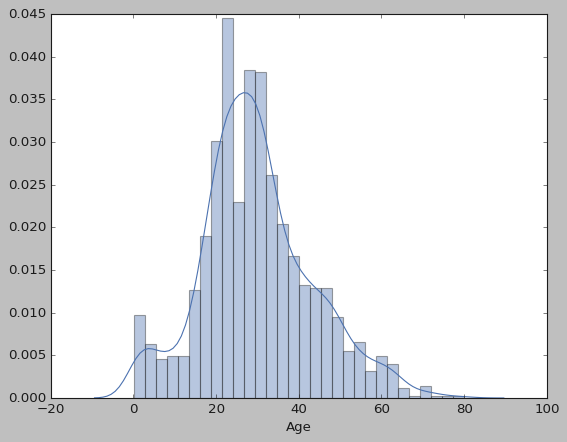

In [152]:
# your code here

sns.distplot(titanic["Age"])

#### Use the appropriate plot to visualize the column `Gender`. There are 2 ways of doing it. Do it both ways.

*Hint: Use matplotlib and seaborn*

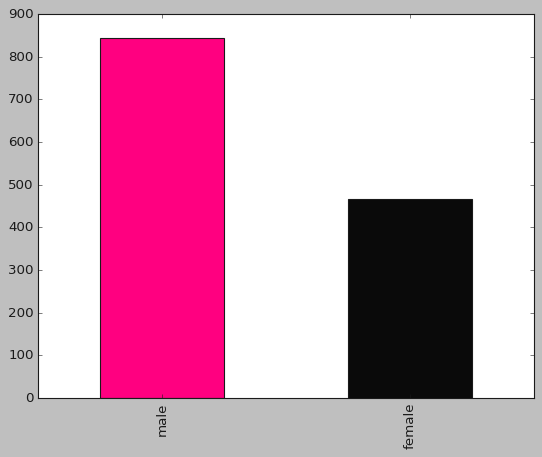

In [153]:
# your code here- 1st way

values = titanic["Gender"].value_counts()
colors = ("#ff0080", "#0a0a0a")
values.plot(kind = "bar", color = colors)

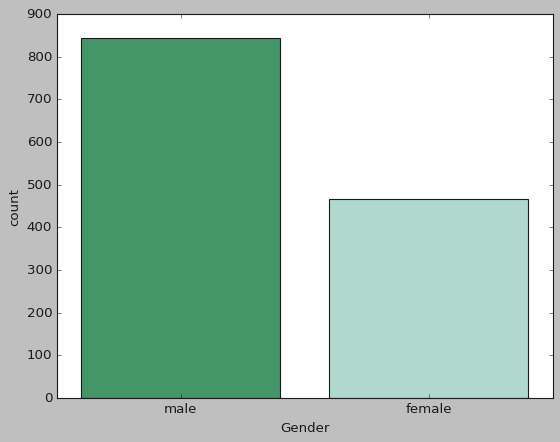

In [154]:
# your code here- 2nd way

sns.countplot(x = "Gender", data = titanic, palette = "BuGn_r")

#### Use the appropriate plot to visualize the column `Pclass` 


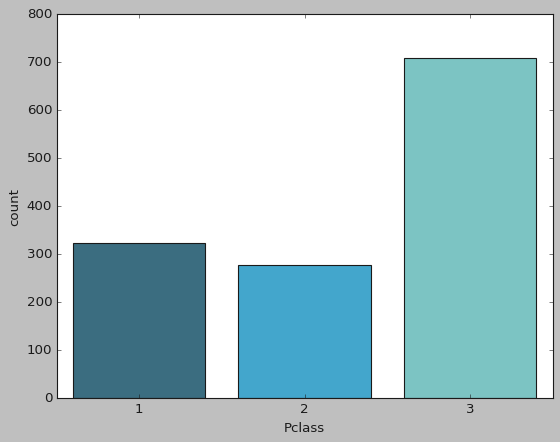

In [155]:
# your code here

sns.countplot(x = "Pclass", data = titanic, palette = "GnBu_d", saturation = 1)

#### We would like to have in one single plot the summary statistics of the feature `Age`. Choose the appropriate plot to show below.

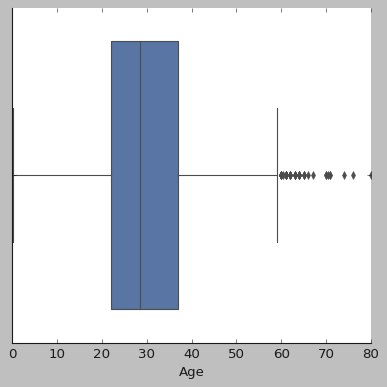

In [156]:
# your code here

sns.catplot(x = "Age", kind="box", data = titanic)

#### What does the previous plot tell you about the feature `Age`? Comment.

The mean age is around 29, 50% of the values are between 20 and 40, and there are outliers with values over 60 y.o.

#### Now in addition to the summary statistics, we also want to visualize the distribution of `Age`. Choose the appropriate plot to sow below.

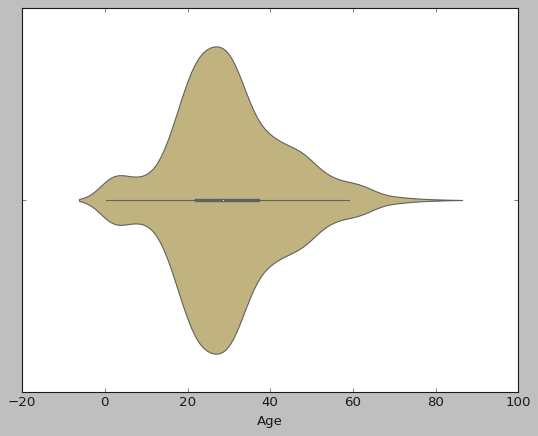

In [157]:
#your code here
# Sé que no hace falta poner Gender en el eje y, pero estaba probando y me ha gustado.

sns.set_color_codes()
sns.violinplot(x = titanic["Age"], color = "y", hue = titanic["Gender"], split = True)

#### What additional information in the previous plot provide you about the feature `Age`? Comment.

In [158]:
#your comment here



#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the appropriate plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.

*Hint: One of the ways involves using Seaborn*

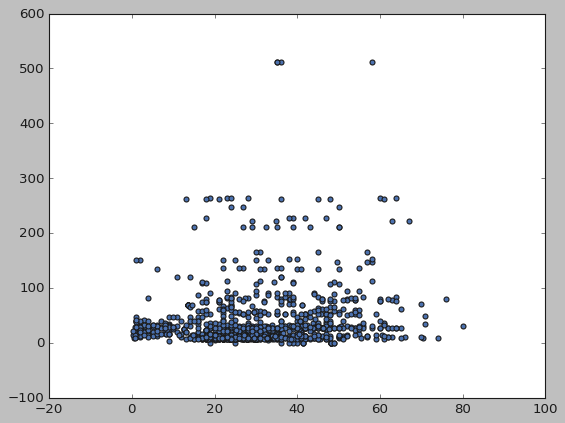

In [159]:
#your code-1st way

plt.figure()
plt.scatter(titanic["Age"], titanic["Fare"])

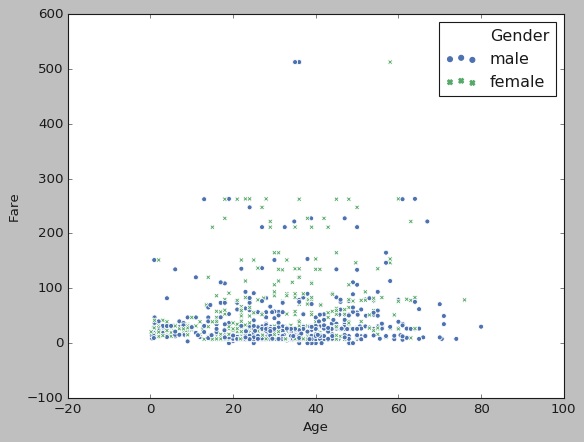

In [160]:
# your code-2nd way

sns.scatterplot(titanic["Age"], titanic["Fare"], hue = titanic["Gender"], style = titanic["Gender"])

#### Using Seaborn plot the correlation matrix of various features.

*Hint: search how to use `heatmap`*

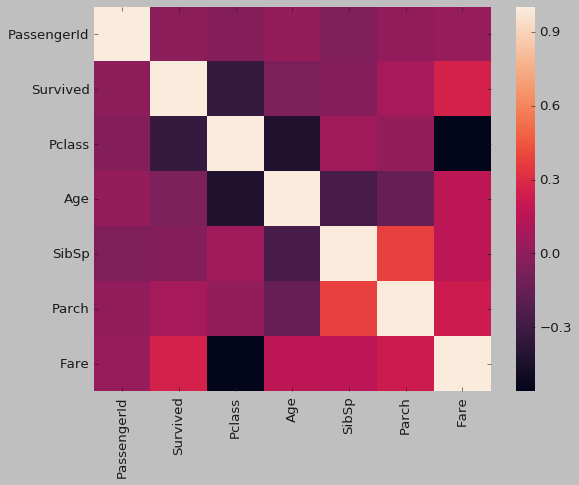

In [161]:
#your code here

correlations = titanic.corr()

sns.heatmap(correlations)

#### According to the previous plot, what are the most correlated feature? Comment.

SibSp and Parch.

#### Use the appropriate plot to display the summary statistics of the `Age` in function of the `Pclass`.

*Hint: use boxplot to display summary statistics of `Age` in relation to each of the discrete values of `Pclass`*

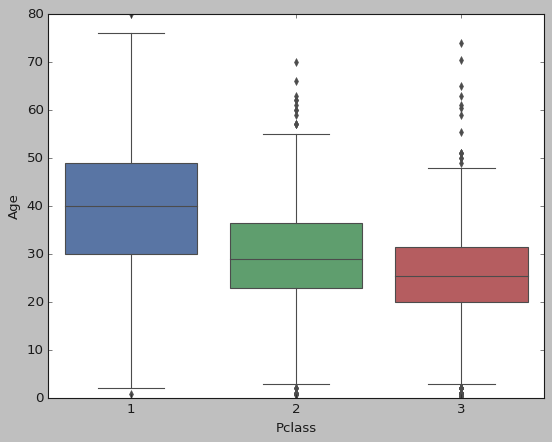

In [163]:
#your code here

sns.boxplot(x = "Pclass", y = "Age", data = titanic)

#### Use the appropriate plot to display the distributions of  `Age` in relation to  `Gender`.

*Hint: use Facetgrid to display the distribution of `Age` for each categorical value of `Gender`*

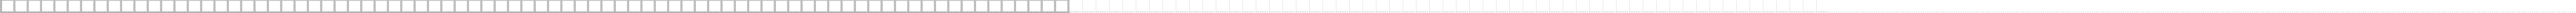

In [166]:
#your code here

